In [26]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('data.csv')

# Filter rows where valid lap
data = data[data['INVALID_LAP'] == 0]

# remove outliers
data = data[data['SECTION_TIME_MS']<=13000]

# Define the target and features
target = 'SECTION_TIME_MS'
features = ['FB_BRAKE', 'MB_BRAKE', 'FT_THROTTLE', 'MT_THROTTLE', 'FS_STEERING', 'FS_BRAKE', 'MS_STEERING', 'MS_BRAKE', 'MS_THROTTLE',
            'FB_SPEED', 'FT_SPEED', 'MT_SPEED', 'FS_SPEED', 'MS_SPEED',
            'FB_LAP_DIST', 'FS_LAP_DIST', 'FT_LAP_DIST', 'MS_LAP_DIST', 'MS_LAP_DIST', 'MB_LAP_DIST', 'MT_LAP_DIST',
            'FB_DIST_FROM_LEFT', 'FS_DIST_FROM_LEFT', 'FT_DIST_FROM_LEFT', 'MS_DIST_FROM_LEFT', 'MT_DIST_FROM_LEFT',
            '360_DIST_FROM_LEFT', '360_ANGLE_APEX_1', '360_SPEED', '468_DIST_FROM_LEFT', '468_ANGLE_APEX_2', '468_SPEED']

X = data[features]
y = data[target]

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Fit the GAM model
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) +
                s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26))
gam.fit(X_train, y_train)

# Make predictions
predictions = gam.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"GAM MSE: {mse}")
print(f"GAM MAE: {mae}")
print(f"GAM R²: {r2}")

GAM MSE: 539163.8108303286
GAM MAE: 565.2621311856958
GAM R²: -0.5741203209127959


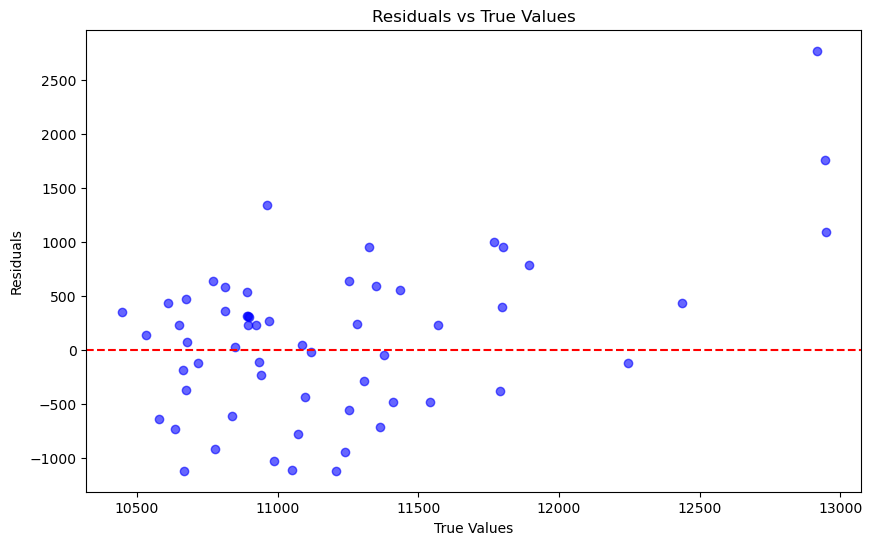

In [29]:
# Calculate residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.title("Residuals vs True Values")
plt.show()

In [20]:
# Hyperparameter tuning (e.g., max_iter, tol)
gam_tuned = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) +
                     s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26),
                     max_iter=200, tol=0.001)
gam_tuned.fit(X_train, y_train)

# Make predictions with the tuned model
predictions_tuned = gam_tuned.predict(X_test)

# Calculate new evaluation metrics
mse_tuned = mean_squared_error(y_test, predictions_tuned)
mae_tuned = mean_absolute_error(y_test, predictions_tuned)
r2_tuned = r2_score(y_test, predictions_tuned)

# Print tuned metrics
print(f"Tuned GAM MSE: {mse_tuned}")
print(f"Tuned GAM MAE: {mae_tuned}")
print(f"Tuned GAM R²: {r2_tuned}")


Tuned GAM MSE: 1505446.6961267667
Tuned GAM MAE: 972.0653978478674
Tuned GAM R²: 0.5853896897496387


In [39]:
import numpy as np
from pygam import LinearGAM, s
from scipy.optimize import minimize

# Define the features (lap distances)
X = data[['FB_LAP_DIST', 'MB_LAP_DIST', 'FS_LAP_DIST', 'MS_LAP_DIST', 'FT_LAP_DIST', 'MT_LAP_DIST']]
y = data['SECTION_TIME_MS']

# Train the GAM model
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5))
gam.fit(X, y)

# Define the objective function to minimize (predicted SECTION_TIME_MS)
def objective(lap_dists):
    lap_dist_features = np.array(lap_dists).reshape(1, -1)  # Reshape to 2D array for the model
    predicted_time = gam.predict(lap_dist_features)
    return predicted_time[0]  # Return the predicted value

# Initialize the optimization with the mean of the features
initial_values = X.mean().values 

# Define the bounds for the lap distances (greater than 0)
bounds = [(0.0001, None)] * len(initial_values)  # Small positive lower bound to avoid zero

# Perform the optimization using 'L-BFGS-B' method with bounds (positive values)
result = minimize(objective, initial_values, method='L-BFGS-B', bounds=bounds)

# Get the optimal lap distances and the predicted minimum time
optimal_lap_dists = result.x
predicted_min_time = result.fun 

# Output the optimal values and predicted minimum time
print("Optimal LAP_DIST configuration for minimum SECTION_TIME_MS:")
for moment, opt_dist in zip(['FB_LAP_DIST', 'MB_LAP_DIST', 'FS_LAP_DIST', 'MS_LAP_DIST', 'FT_LAP_DIST', 'MT_LAP_DIST'], optimal_lap_dists):
    print(f"{moment}: {opt_dist:.2f}")
print(f"Predicted minimum SECTION_TIME_MS: {predicted_min_time:.2f}")


Optimal LAP_DIST configuration for minimum SECTION_TIME_MS:
FB_LAP_DIST: 266.56
MB_LAP_DIST: 286.26
FS_LAP_DIST: 320.44
MS_LAP_DIST: 382.58
FT_LAP_DIST: 344.39
MT_LAP_DIST: 336.44
Predicted minimum SECTION_TIME_MS: 10649.44
